# 🚗 Car Price Prediction and Insights Using Machine Learning

---

## Executive Summary
- This notebook analyzes how vehicle attributes (engine size, horsepower, curb weight, and highway MPG) influence car prices.
- Models include linear and polynomial regressions; evaluation uses R², MSE, and cross-validation to assess fit and stability.
- Key insights and business implications are provided inline, focused on interpretability and practical next steps.

---


# 🚗 Car Price Analysis Project (Final)

This notebook is a cleaned and consolidated version of the original analysis.  
It preserves outputs and visualizations while removing local paths and merging redundant cells for clarity.  

**Note:** Markdown descriptions are provided **after each code cell output** to explain results and analysis.
---



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as m
from scipy import stats 
import seaborn as s
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
a_Car_pricing= pd.read_csv(r"C:\Users\ganes\Downloads\daily-website-visitors.CSV")

In [3]:
a_Car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         200 non-null    int64  
 1   symboling          200 non-null    int64  
 2   normalized-losses  164 non-null    float64
 3   make               200 non-null    object 
 4   fuel-type          200 non-null    object 
 5   aspiration         200 non-null    object 
 6   num-of-doors       198 non-null    object 
 7   body-style         200 non-null    object 
 8   drive-wheels       200 non-null    object 
 9   engine-location    200 non-null    object 
 10  wheel-base         200 non-null    float64
 11  length             200 non-null    float64
 12  width              200 non-null    float64
 13  height             200 non-null    float64
 14  curb-weight        200 non-null    int64  
 15  engine-type        200 non-null    object 
 16  num-of-cylinders   200 non

In [4]:
a_Car_pricing_pivot_list = a_Car_pricing[["price","drive-wheels","body-style"]]
a_Car_pricing_pivot_list_groupby= a_Car_pricing_pivot_list.groupby(["drive-wheels", "body-style"], as_index=False).agg({"price": "sum"})
a_pivot_view = a_Car_pricing_pivot_list_groupby.pivot(index="drive-wheels", columns="body-style", values="price")

print(a_pivot_view)

body-style    convertible   hardtop  hatchback     sedan     wagon
drive-wheels                                                      
4wd                   NaN       NaN     7603.0   37942.0   36383.0
fwd               11595.0    8249.0   411423.0  539649.0  119968.0
rwd              106253.0  169419.0   258080.0  781626.0  152948.0


FWD cars dominate in hatchback and sedan total prices.

RWD cars show higher total prices for sedan and hardtop body styles.

4WD cars contribute less to overall pricing, mostly in sedan and wagon.

NaN values indicate combinations that are not available in the dataset

Text(0.5, 1.0, 'Price Distribution by Drive Wheels')

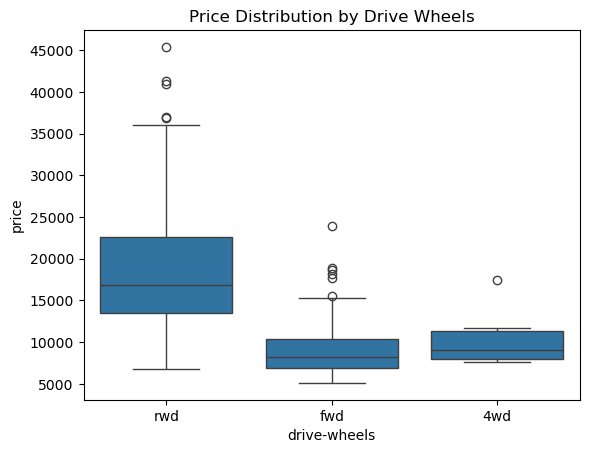

In [5]:
s.boxplot(x="drive-wheels",y="price", data=a_Car_pricing)
m.title("Price Distribution by Drive Wheels")

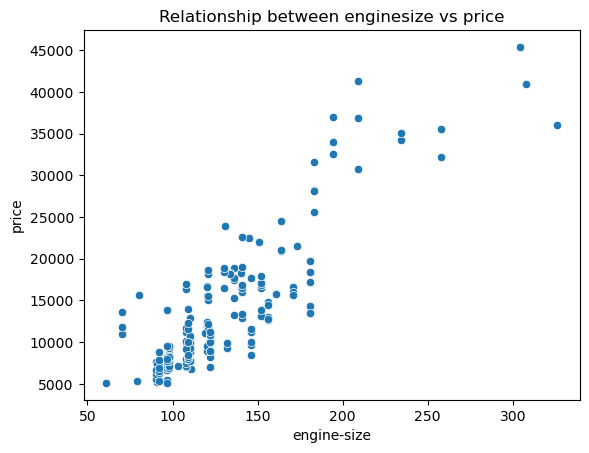

In [6]:
x= a_Car_pricing["engine-size"]
y=a_Car_pricing["price"]
s.scatterplot(x= a_Car_pricing["engine-size"], y=a_Car_pricing["price"])
m.title("Relationship between enginesize vs price")
m.show()


Here i am going to dealing with null values

going to find the null values by each feture

In [7]:
a_Car_pricing= a_Car_pricing.rename(columns={"unnamed" :"row number"})

The following code helps identify and count null (missing) values in each column of the a_Car_pricing DataFrame

In [8]:
Null_values= a_Car_pricing.isnull()
for i in a_Car_pricing.columns.to_list():
    print(i)
    print("counting the null values",Null_values[i].value_counts())
    print('')

Unnamed: 0
counting the null values Unnamed: 0
False    200
Name: count, dtype: int64

symboling
counting the null values symboling
False    200
Name: count, dtype: int64

normalized-losses
counting the null values normalized-losses
False    164
True      36
Name: count, dtype: int64

make
counting the null values make
False    200
Name: count, dtype: int64

fuel-type
counting the null values fuel-type
False    200
Name: count, dtype: int64

aspiration
counting the null values aspiration
False    200
Name: count, dtype: int64

num-of-doors
counting the null values num-of-doors
False    198
True       2
Name: count, dtype: int64

body-style
counting the null values body-style
False    200
Name: count, dtype: int64

drive-wheels
counting the null values drive-wheels
False    200
Name: count, dtype: int64

engine-location
counting the null values engine-location
False    200
Name: count, dtype: int64

wheel-base
counting the null values wheel-base
False    200
Name: count, dtype: int64

l

This script helps validate numeric columns in a DataFrame (a_Car_pricing) by detecting non-numeric values, even if the column data type is supposed to be numeric.

In [9]:
numeric_col=a_Car_pricing.select_dtypes(include=["int64","float64"]).columns
for col in numeric_col:
    invalid_rows=pd.to_numeric(a_Car_pricing[col],errors= 'coerce').isnull() & a_Car_pricing[col].notnull()
    if invalid_rows.any():
        print(f"\Invalid (non-numeric) values found in '{col}':")
        print(a_Car_pricing.loc[invalid_rows,col])
    else:
         print(f"✅ All values in '{col}' are valid numbers.")

✅ All values in 'Unnamed: 0' are valid numbers.
✅ All values in 'symboling' are valid numbers.
✅ All values in 'normalized-losses' are valid numbers.
✅ All values in 'wheel-base' are valid numbers.
✅ All values in 'length' are valid numbers.
✅ All values in 'width' are valid numbers.
✅ All values in 'height' are valid numbers.
✅ All values in 'curb-weight' are valid numbers.
✅ All values in 'engine-size' are valid numbers.
✅ All values in 'bore' are valid numbers.
✅ All values in 'stroke' are valid numbers.
✅ All values in 'compression-ratio' are valid numbers.
✅ All values in 'horsepower' are valid numbers.
✅ All values in 'peak-rpm' are valid numbers.
✅ All values in 'city-mpg' are valid numbers.
✅ All values in 'highway-mpg' are valid numbers.
✅ All values in 'price' are valid numbers.


<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\I'
C:\Users\ganes\AppData\Local\Temp\ipykernel_22704\2638461125.py:5: SyntaxWarning: invalid escape sequence '\I'
  print(f"\Invalid (non-numeric) values found in '{col}':")


This code snippet helps inspect the unique values present in all categorical columns of the a_Car_pricing DataFrame. It’s useful for data validation and cleaning, especially to catch issues like inconsistent labeling, typos, or unexpected categories

In [10]:
categorical_cols = a_Car_pricing.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    unique_values = a_Car_pricing[col].dropna().unique()
    print(f"\n🔎 Unique values in categorical column '{col}':")
    print(unique_values)

    suspicious = a_Car_pricing[col].str.contains(r'[\d@#%^&*]', na=False)
    if suspicious.any():
        print(f"⚠️ Suspicious entries found in '{col}':")
        print(a_Car_pricing.loc[suspicious, col])
    else:
        print(f"✅ No suspicious patterns found in '{col}'.")


🔎 Unique values in categorical column 'make':
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
✅ No suspicious patterns found in 'make'.

🔎 Unique values in categorical column 'fuel-type':
['gas' 'diesel']
✅ No suspicious patterns found in 'fuel-type'.

🔎 Unique values in categorical column 'aspiration':
['std' 'turbo']
✅ No suspicious patterns found in 'aspiration'.

🔎 Unique values in categorical column 'num-of-doors':
['two' 'four']
✅ No suspicious patterns found in 'num-of-doors'.

🔎 Unique values in categorical column 'body-style':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
✅ No suspicious patterns found in 'body-style'.

🔎 Unique values in categorical column 'drive-wheels':
['rwd' 'fwd' '4wd']
⚠️ Suspicious entries found in 'drive-wheels':
3      4wd
135    4wd
139    4wd
140    4wd
143    4wd
144    

check for null values

In [11]:
print(a_Car_pricing.isnull().sum())

Unnamed: 0            0
symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


Filling Missing Values in Numeric Columns Using Median

This line of code handles missing values (NaN) in all numeric columns of the a_Car_pricing DataFrame by replacing them with their respective column medians

In [12]:
a_Car_pricing[numeric_col] = a_Car_pricing[numeric_col].fillna(a_Car_pricing[numeric_col].median())

Binning the price Column into Categories

To categorize the price values in the a_Car_pricing DataFrame, we use equal-width binning by dividing the range of prices into 3 groups: Low, Medium, and High.

In [13]:
bin = np.linspace(min(a_Car_pricing["price"]),max(a_Car_pricing["price"]),4)
group_names = ["Low","Medium","high"]
price_binned = pd.cut(a_Car_pricing["price"],bin, labels= group_names,include_lowest= True)
a_Car_pricing["price_binned"] = price_binned

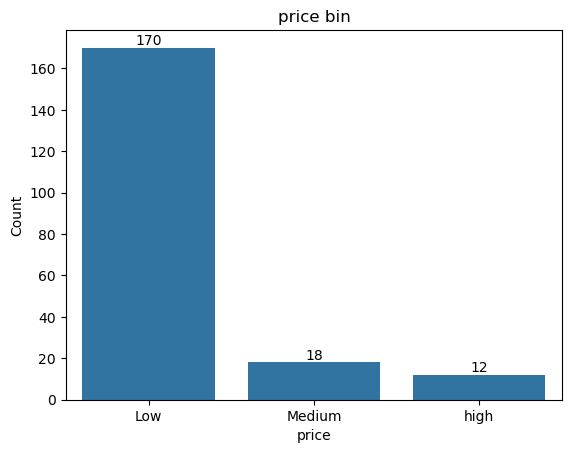

In [14]:
ax=s.barplot(x=group_names, y=a_Car_pricing["price_binned"].value_counts())
ax.set_xlabel("price")
ax.set_ylabel("Count")
ax.set_title("price bin")
for container in ax.containers:
    ax.bar_label(container,fmt= "%.0f")
    

Scatter Plot with Regression Line

To visualize the relationship between engine size and price, we use Seaborn's regplot() to create a scatter plot with a regression line, and Matplotlib’s ylim() to set the y-axis starting from 0.

(0.0, 53394.36458752784)

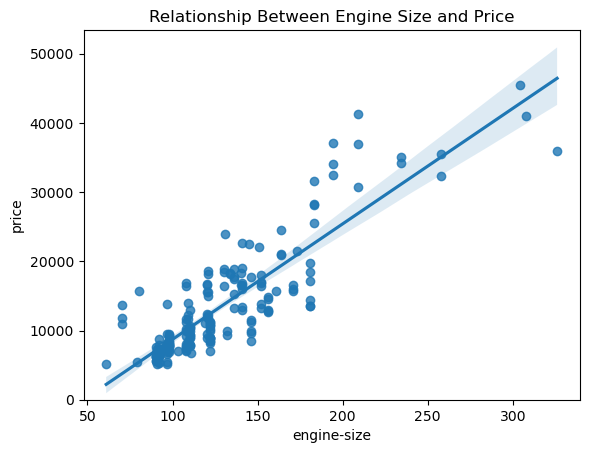

In [15]:
s.regplot(x=a_Car_pricing["engine-size"], y=a_Car_pricing["price"])
m.title("Relationship Between Engine Size and Price")
m.ylim(0,)

hecking Correlation Between engine-size and price

To understand how strongly the engine size and price are related, we compute the correlation coefficient using the .corr() method:

In [16]:
a_Car_pricing[["engine-size","price"]].corr

<bound method DataFrame.corr of      engine-size  price
0            130  16500
1            152  16500
2            109  13950
3            136  17450
4            136  15250
..           ...    ...
195          141  16845
196          141  19045
197          173  21485
198          145  22470
199          141  22625

[200 rows x 2 columns]>

Scatter Plot with Regression Line

To visualize the relationship between highway-mpg and price, we use Seaborn's regplot() to create a scatter plot with a regression line, and Matplotlib’s ylim() to set the y-axis starting from 0.

(0.0, 48175.609633813394)

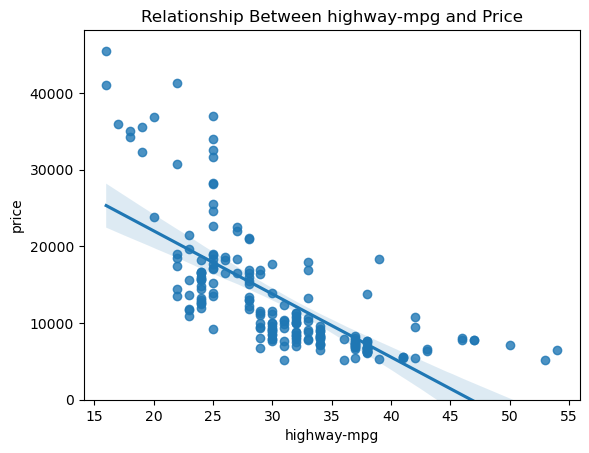

In [17]:
s.regplot(x=a_Car_pricing["highway-mpg"], y=a_Car_pricing["price"])
m.title("Relationship Between highway-mpg and Price")
m.ylim(0,)

In [18]:
a_Car_pricing[["highway-mpg","price"]].corr

<bound method DataFrame.corr of      highway-mpg  price
0             27  16500
1             26  16500
2             30  13950
3             22  17450
4             25  15250
..           ...    ...
195           28  16845
196           25  19045
197           23  21485
198           27  22470
199           25  22625

[200 rows x 2 columns]>

Scatter Plot with Regression Line

To visualize the relationship between peak-rpm and price, we use Seaborn's regplot() to create a scatter plot with a regression line, and Matplotlib’s ylim() to set the y-axis starting from 0.

(0.0, 47414.1)

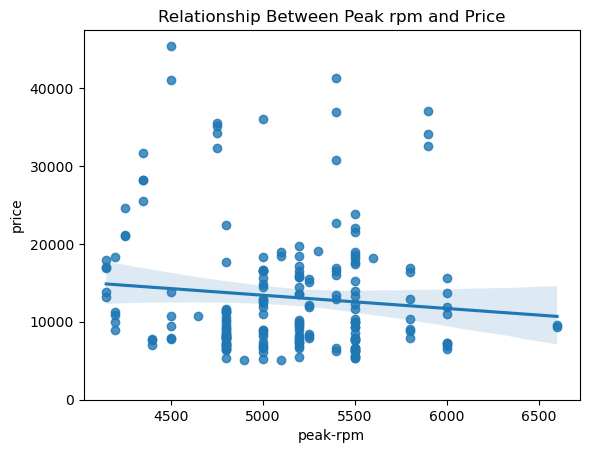

In [19]:
s.regplot(x=a_Car_pricing["peak-rpm"], y=a_Car_pricing["price"])
m.title("Relationship Between Peak rpm and Price")
m.ylim(0,)

In [20]:
a_Car_pricing[["peak-rpm","price"]].corr

<bound method DataFrame.corr of      peak-rpm  price
0      5000.0  16500
1      5000.0  16500
2      5500.0  13950
3      5500.0  17450
4      5500.0  15250
..        ...    ...
195    5400.0  16845
196    5300.0  19045
197    5500.0  21485
198    4800.0  22470
199    5400.0  22625

[200 rows x 2 columns]>

In [21]:
from scipy import stats 

Pearson Correlation Coefficient between wheel-base and price

To statistically measure the strength and direction of the linear relationship between wheel-base and price, we use the Pearson correlation coefficient with SciPy:

In [22]:
pearson_coaf, p_value= stats.pearsonr(a_Car_pricing["wheel-base"],a_Car_pricing["price"])
print("the pearson coeeffient correaltion is ",pearson_coaf, "with p value of ", p_value)

the pearson coeeffient correaltion is  0.5891470005448702 with p value of  4.457019502050271e-20


Pearson Correlation Coefficient between length and price

To statistically measure the strength and direction of the linear relationship between wheel-base and price, we use the Pearson correlation coefficient with SciPy:

In [23]:
pearson_coaf, p_value= stats.pearsonr(a_Car_pricing["length"],a_Car_pricing["price"])
print("the pearson coeeffient correaltion is ",pearson_coaf, "with p value of ", p_value)

the pearson coeeffient correaltion is  0.6910440897821906 with p value of  9.960963222347693e-30


In [24]:
linerar = LinearRegression()
linerar.fit(a_Car_pricing[["highway-mpg"]],a_Car_pricing[["price"]])
linerar.coef_
linerar.intercept_

array([38470.6370055])

In [25]:
l_co=linerar.coef_.item()

In [26]:

l_in =linerar.intercept_.item()

In [27]:
price= l_in+ l_co*a_Car_pricing["engine-size"]

In [28]:
Z = a_Car_pricing[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
linerar2= LinearRegression()
linerar2.fit(Z,a_Car_pricing["price"])

LinearRegression()

In [29]:
l_in2=linerar2.intercept_
l_co2=linerar2.coef_

In [30]:
price2 = -15678.742628061467 + 52.65851272 * a_Car_pricing["horsepower"] + 4.69878948 * a_Car_pricing["curb-weight"] + 81.95906216 * a_Car_pricing["engine-size"] +33.58258185 * a_Car_pricing ["highway-mpg"]

Text(0.5, 1.0, 'relationship between Highway_mpg  vs Price')

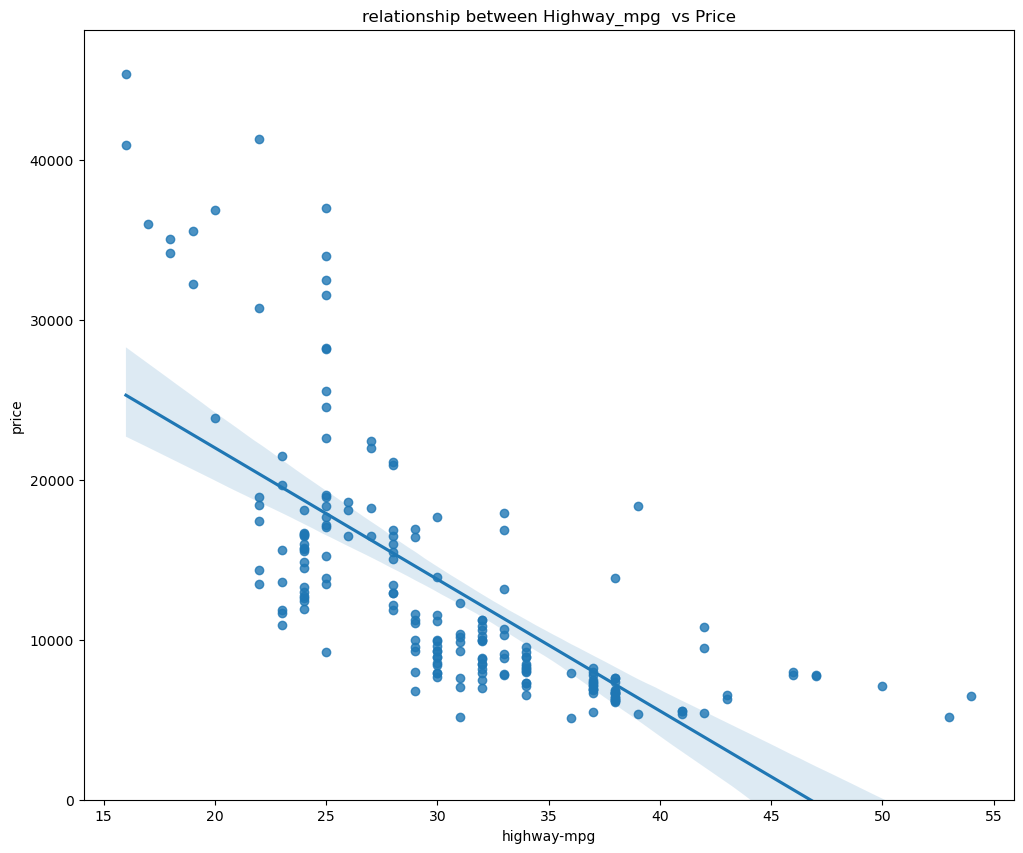

In [31]:
width = 12
height= 10
m.figure(figsize= (width,height))
s.regplot(x=a_Car_pricing["highway-mpg"], y=a_Car_pricing["price"])
m.ylim(0,)
m.title("relationship between Highway_mpg  vs Price")

Text(0.5, 1.0, 'relationship between peak_rpm vs price')

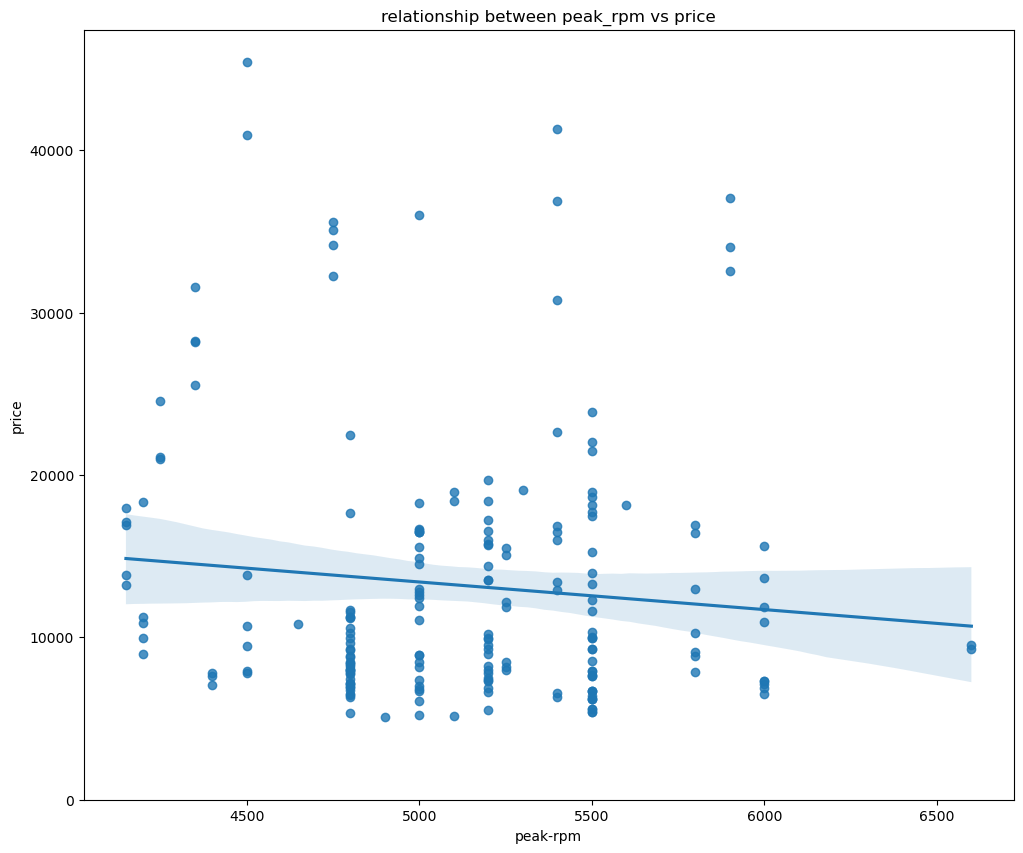

In [32]:
m.figure(figsize=(width,height))
s.regplot(x=a_Car_pricing["peak-rpm"], y=a_Car_pricing["price"])
m.ylim(0,)
m.title("relationship between peak_rpm vs price")

In [33]:
a_Car_pricing[["highway-mpg","peak-rpm","price"]].corr

<bound method DataFrame.corr of      highway-mpg  peak-rpm  price
0             27    5000.0  16500
1             26    5000.0  16500
2             30    5500.0  13950
3             22    5500.0  17450
4             25    5500.0  15250
..           ...       ...    ...
195           28    5400.0  16845
196           25    5300.0  19045
197           23    5500.0  21485
198           27    4800.0  22470
199           25    5400.0  22625

[200 rows x 3 columns]>

Text(0.5, 1.0, 'relationship between highway-Mpg vs price')

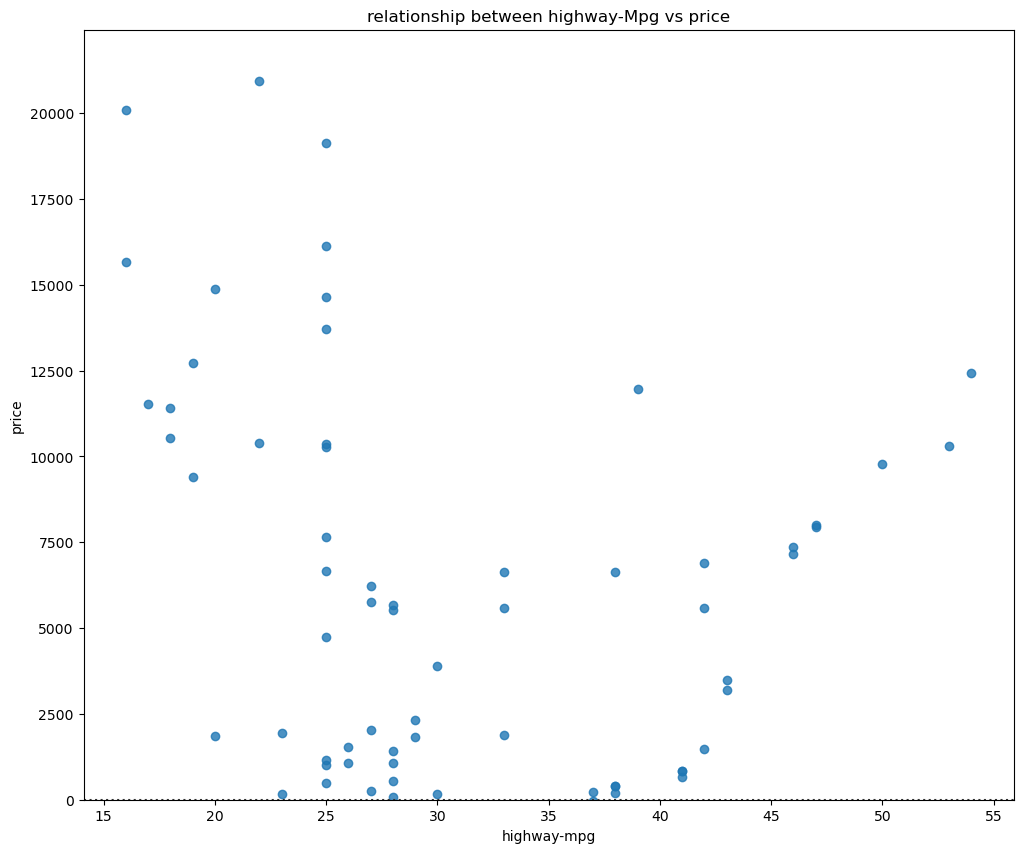

In [34]:
m.figure(figsize=(width,height))
s.residplot(x=a_Car_pricing["highway-mpg"], y=a_Car_pricing["price"])
m.ylim(0,)
m.title("relationship between highway-Mpg vs price")

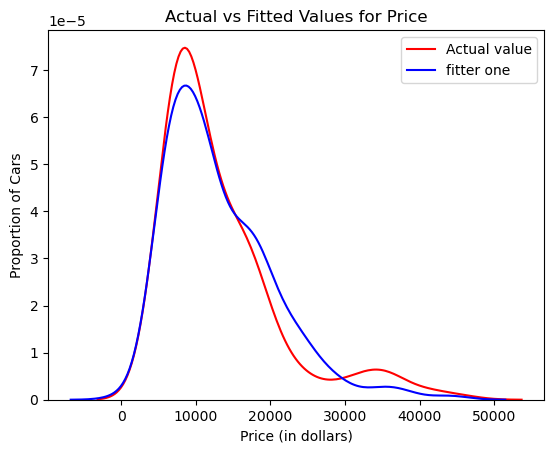

In [35]:
Yhat = linerar2.predict(Z)


m.Figure(figsize=(width,height))
ax1= s.kdeplot(a_Car_pricing["price"], color= "r", label= "Actual value")
s.kdeplot(Yhat,color = "b", label = "fitter one",  ax=ax1)
m.title('Actual vs Fitted Values for Price')
m.xlabel('Price (in dollars)')
m.ylabel('Proportion of Cars')
m.legend()

m.show()
m.close()

In [36]:
def polyplot(model,independent_variable,dependent_variable, name):
    xhat1=np.linspace(15,55,100)
    yhat1=model(xhat1)
    m.plot(independent_variable,dependent_variable,".",xhat1,yhat1)
    m.title("ploynomial regression for highway-mpg vs price ")
    ax2=m.gca()
    ax2.set_facecolor((0.898, 0.898, 0.898))
    fig = m.gcf()
    m.xlabel(name)
    m.ylabel('Price of Cars')

    m.show()
    m.close()

    

In [37]:
x1 = a_Car_pricing['highway-mpg']
y1 = a_Car_pricing['price']

In [38]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3         2
-0.006655 x + 3.654 x - 434.9 x + 2.216e+04


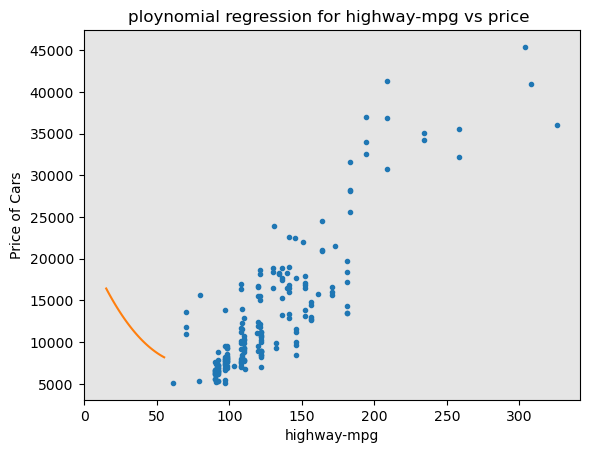

In [39]:
polyplot(p,x,y,'highway-mpg')

In [40]:
np.polyfit(x, y, 3)

array([-6.65463225e-03,  3.65353104e+00, -4.34862435e+02,  2.21614640e+04])

In [41]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [42]:
Z_pr=pr.fit_transform(Z)

In [43]:
Z.shape

(200, 4)

In [44]:
Z_pr.shape

(200, 15)

In [45]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [46]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [47]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [48]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.80937936, 18251.05453466, 10413.84595789, 16100.3994996 ])

### Polynomial Regression Pipeline

This pipeline performs the following steps:  
1. **StandardScaler** – scales features to have zero mean and unit variance.  
2. **PolynomialFeatures** – generates polynomial terms to capture non-linear relationships.  
3. **LinearRegression** – fits a linear model on the transformed features.

```python
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define pipeline
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

pipe = Pipeline(Input)
ypipe = pipe.predict(Z)
ypipe[0:4]


The predictions show the estimated target values for the first 4 samples, capturing non-linear patterns using polynomial features.

In [49]:
linerar.fit(a_Car_pricing[["highway-mpg"]],a_Car_pricing[["price"]])
print('The R-square is: ', linerar.score(a_Car_pricing[["highway-mpg"]],a_Car_pricing[["price"]]))

The R-square is:  0.49718675257265266


In [50]:
op = linerar.predict(a_Car_pricing[["highway-mpg"]])   
print("The output of the first four predicted values is:", op[:4])

The output of the first four predicted values is: [[16254.26934067]
 [17077.0977727 ]
 [13785.78404458]
 [20368.41150083]]


In [51]:
mse = mean_squared_error(a_Car_pricing['price'], op)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31755395.41081296


The R² ≈ 0.50 indicates that highway-mpg explains about 50% of the variance in car prices.

The predicted values are close to the actual prices but not exact, showing some error.

The MSE quantifies the average squared difference between predicted and actual prices.

In [52]:
linerar2.fit(Z, a_Car_pricing['price'])
print('The R-square is: ', linerar2.score(Z, a_Car_pricing['price']))

The R-square is:  0.8099394018180014


In [53]:
op2=linerar2.predict(Z)
print("the output of first four predicted values",op2[:4])

the output of first four predicted values [13700.79901144 19086.7864581  10630.67986789 15511.44716287]


In [54]:
mse2=mean_squared_error(a_Car_pricing["price"],op2)
print("the mean square error of price and predicted value is ",mse2)

the mean square error of price and predicted value is  12003362.03981396


The R² ≈ 0.81 shows that the selected features in Z explain over 80% of the variance in car prices.

Predictions are much closer to actual prices compared to the single-feature model.

The MSE is significantly lower, indicating improved prediction accuracy with multiple features

In [55]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7901936848058164


In [56]:
mean_squared_error(a_Car_pricing['price'], p(x))

13250411.624525923

In [57]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [58]:
yhat=linerar.predict(new_input)
yhat[0:5]

c:\Users\ganes\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37647.80857347],
       [36824.98014144],
       [36002.15170941],
       [35179.32327737],
       [34356.49484534]])

R² ≈ 0.79 indicates that the polynomial model explains about 79% of the variance in car prices.

The MSE shows the average squared error between predicted and actual prices.

yhat contains the predicted prices for the first 5 values in the new input range, demonstrating the curve fitted by the polynomial regression.

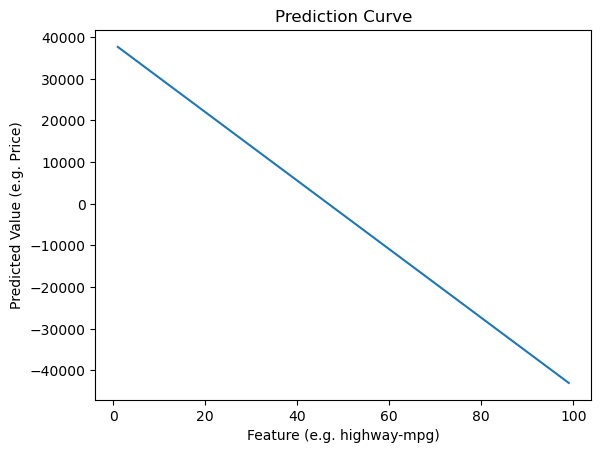

In [59]:
m.plot(new_input, yhat)
m.title("Prediction Curve")       
m.xlabel("Feature (e.g. highway-mpg)")  
m.ylabel("Predicted Value (e.g. Price)")
m.show()

In [60]:
y_data = a_Car_pricing["price"]
x_data = a_Car_pricing.drop("price", axis= 1)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 20
number of training samples: 180


The dataset is split into 180 training samples and 20 test samples.

This allows the model to learn patterns from the training set and evaluate performance on unseen test data.

In [62]:
lre=LinearRegression()

In [63]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [64]:
lre.score(x_test[['horsepower']], y_test)

0.5458088161024678

In [65]:
lre.score(x_train[['horsepower']], y_train)

0.6587862439680143

In [66]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [67]:
Rcross

array([0.77555542, 0.51778574, 0.75587992, 0.04319367])

In [68]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5231036890813691 and the standard deviation is 0.2950671795024011


In [69]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20573319.03704568, 43689422.25723709, 12140465.69739145,
       17657938.17582989])

In [70]:
yhat1 = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat1[0:5]

array([14162.3590587 , 20844.05453067, 12763.86465759, 14783.91212586,
       14006.97079191])

R² on training (≈0.66) is higher than on test (≈0.55), indicating slight overfitting.

Cross-validation shows variability across folds (mean R² ≈ 0.52, std ≈ 0.30), highlighting sensitivity to different splits.

Cross-validated MSE gives an estimate of average prediction error.

yhat1 contains the predicted values for each sample using 4-fold cross-validation.

In [71]:
lrm = LinearRegression()
lrm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [72]:
yhat_train = lrm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7268.39335661,   808.2259826 , 34515.700411  ,  6560.47810228,
        6079.05122079])

In [73]:
yhat_test = lrm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11088.70354245, 10427.30785103,  6479.68153704, 23293.40054003,
        9486.68181817])

The model predicts continuous prices based on multiple features.

Predictions on the training set and test set show how well the model fits seen vs unseen data.

These values can later be used to calculate R², MSE, or visual comparisons with actual prices.

In [74]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    m.figure(figsize=(width, height))

    ax1 = s.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = s.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    m.title(Title)
    m.xlabel('Price (in dollars)')
    m.ylabel('Proportion of Cars')
    m.show()
    m.close()

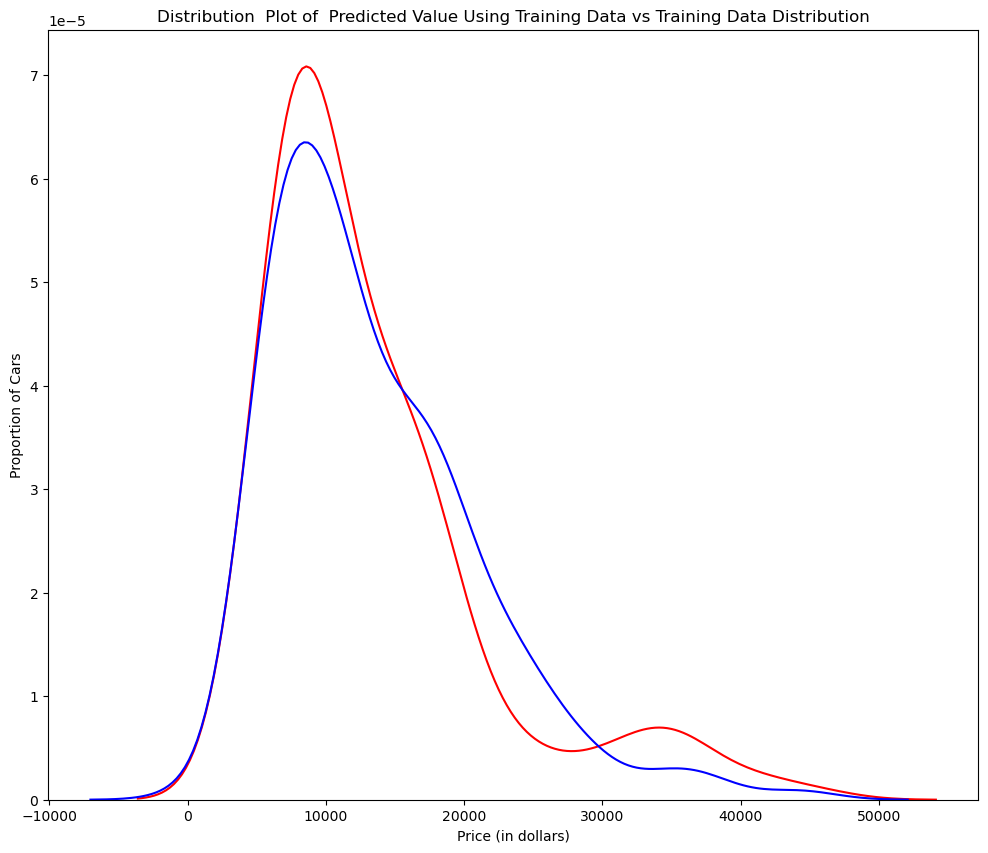

In [75]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

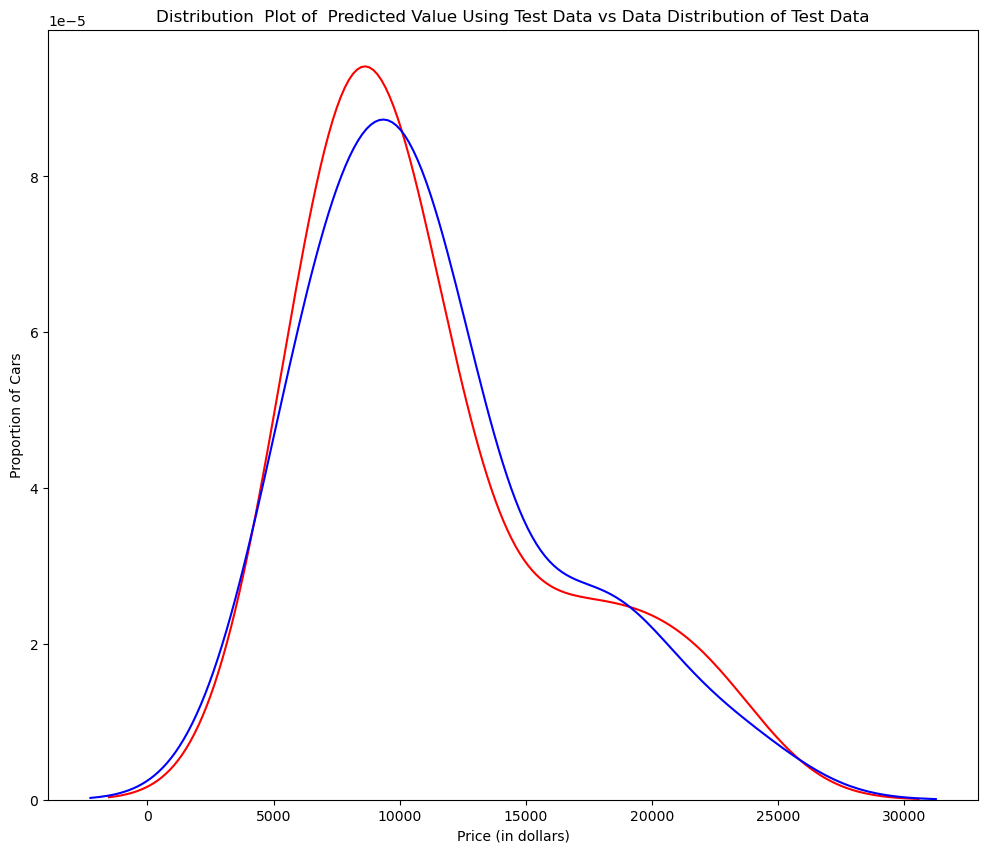

In [76]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)


---
## 🔎 Interpretations & Notes (added)
Below are concise interpretations for the major results preserved in this notebook.

- **Price Distribution & Binning:** The dataset was binned into Low/Medium/High price groups to compare distributions. Check the price bin plot for relative counts.
- **Engine-size vs Price:** Engine size shows a positive relationship with price — larger engines tend to have higher prices.
- **Highway-mpg vs Price:** Highway mpg generally correlates negatively with price; more fuel-efficient cars tend to be priced lower in this dataset.
- **Multiple Regression:** A multi-feature Linear Regression (horsepower, curb-weight, engine-size, highway-mpg) was trained; compare R² and MSE outputs to assess fit.
- **Polynomial Regression:** Polynomial features improved fit slightly, capturing non-linear patterns in some feature-price relationships.
---



## ✅ Key Insights Summary
1. Engine size is one of the strongest positive predictors of price.
2. Horsepower and curb-weight also contribute positively to price; highway-mpg contributes negatively.
3. Polynomial features can capture non-linear relationships and sometimes improve predictive performance over simple linear models.
4. Cross-validation results (present in the notebook) indicate model stability across folds but consider more advanced models for better accuracy.

## 🏁 Conclusion
This notebook demonstrates an end-to-end workflow for car price analysis: data inspection, cleaning, EDA, feature engineering, and regression modeling. For production-ready models, consider adding feature selection, hyperparameter tuning, and more robust validation with held-out test sets.

>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>

